<a href="https://colab.research.google.com/github/MichaelSeitz98/Seminararbeit/blob/main/KindDetektion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Google Drive mounten für Zugriff auf Datensatz und Speichermöglichkeit



In [ ]:
#Mount my local drive...

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Installation der Tensorflow OD API

Muss bei jeder neuen Laufzeit neu installiert werden - auch für die Inferenzanwendung.

In [ ]:
!pip install tensorflow=="2.6.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564.4 MB 2.1 kB/s 
     |████████████████████████████████| 132 kB 6.6 MB/s 
     |████████████████████████████████| 14.8 MB 39.4 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=66e015d8c08cf5d54ef90df0aa5926edecb0b5964a4be206478924abfb5d13db
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=6d968be96f6719300d8dde676f0b2af1d3dadafef5a7b67d959f4f96ef4a1aae
  Stored in directory: /root/.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68724 sha256=85053d9a6895ad8bbc66f07deb5308c80c001a112171caefcdd169e6d6f2f9d6
  Stored in directory: /root/.cache/pip/wheels/62/7

In [ ]:
!pip --version
!python -m pip --version

pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3514, done.
remote: Counting objects: 100% (3514/3514), done.
remote: Compressing objects: 100% (2926/2926), done.
remote: Total 3514 (delta 923), reused 1487 (delta 535), pack-reused 0
Receiving objects: 100% (3514/3514), 46.98 MiB | 35.09 MiB/s, done.
Resolving deltas: 100% (923/923), done.


In [ ]:
!python -m pip --version

pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696220 sha256=28ff0701f0941472fe0e4cb828332c26347be432ee1753b19241420e3b9ee572
  Stored in directory: /tmp/pip-ephem-wheel-cache-yj5cp1hn/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=c152adf0c387ffe72d58467f550a0dc9567322ddb9f11b524dc9e506e1e6b4ea
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=b81a7dae4828dce9bcd66164239683a72c9b97c90be1b440cbbde7e9d1bdf72f
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for avro-python3: filename=avro_p

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [ ]:
pwd

'/content'

In [ ]:
#run model builder test, Test ob initiales Set-up auch wirklich funktioniert
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2022-10-18 19:30:25.264441: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 19:30:25.405327: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-18 19:30:25.434389: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 19:30:26.199148: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

## Datenvorbereitung für Training 



In [ ]:
# Generate TF-Record-Skript von meinem GitHub-Account laden
%pwd

!wget https://raw.githubusercontent.com/MichaelSeitz98/Seminararbeit/44688230a2a4692e06b2ab927ab7abca0eb163ec/generate_tfrecord.py

In [ ]:
# LabelMap von meinem GitHub-Account laden

!wget https://raw.githubusercontent.com/MichaelSeitz98/Seminararbeit/main/labelmap.pbtxt

In [ ]:
# Hier wird die für Tensorflow benötigte TF-Record Datei erzeugt. Spezielles Dateiformat von Tensorflow OD API. TODO: Theorie hinter Dateiformat anschauen und verstehen.

!python /content/drive/myDrive/generate_tfrecord.py --csv_input=/content/drive/MyDrive/Child_Dataset/train_labels.csv --image_dir=/content/drive/MyDrive/Child_Dataset/train --output_path=train.record
!python /content/generate_tfrecord.py --csv_input=/content/drive/MyDrive/Child_Dataset/test_labels.csv --image_dir=/content/drive/MyDrive/Child_Dataset/test --output_path=test.record

2022-10-18 19:32:57.607279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 19:32:57.752450: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-18 19:32:57.781746: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 19:32:58.488057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [ ]:
%cd /content

/content


In [ ]:
# Hier wird die für Tensorflow benötigte TF-Record Datei erzeugt. Spezielles Dateiformat von Tensorflow OD API. TODO: Theorie hinter Dateiformat anschauen und verstehen.

!python /content/generate_tfrecord.py --csv_input=/content/drive/MyDrive/Child_Dataset/train_labels.csv --image_dir=/content/drive/MyDrive/Child_Dataset/train --output_path=train.record
!python /content/generate_tfrecord.py --csv_input=/content/drive/MyDrive/Child_Dataset/test_labels.csv --image_dir=/content/drive/MyDrive/Child_Dataset/test --output_path=test.record

2022-10-18 19:32:57.607279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 19:32:57.752450: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-18 19:32:57.781746: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 19:32:58.488057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [ ]:
# Dateipfade aller fürs Training relevanten Dateien: train.record, test.record, labelmap.pbtxt, + dann noch: config des Modelles

train_record_path = '/content/train.record'
test_record_path = '/content/test.record'
labelmap_path = '/content/labelmap.pbtxt'

## Configuring training

Now that the data is ready it's time to create a training configuration. The OD API supports lots of models, each with its own config file. In this notebook I'm making use of EfficientDet, but you can replace it with any model available in the [Tensorflow 2 Detection Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md).

In [ ]:
# Hier können die entscheidenede Trainingsparamter festgelegt werden -> das sind die Default-Werte

batch_size = 4
num_steps = 3000
num_eval_steps = 100

In [ ]:
# Hier wird sich ein Modell vom Model Zoo als .tar.gz heruntergeladen:  -> an der Stelle kann man Modelle austauschen -> rießiger Vorteil gegenüber YOLO und CO

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz

--2022-10-18 19:33:40--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 209.85.234.128, 2607:f8b0:4001:c17::80
Connecting to download.tensorflow.org (download.tensorflow.org)|209.85.234.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  --.-KB/s    in 0.1s    

2022-10-18 19:33:40 (205 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [ ]:
# Unzip  -> erstellt einen neuen Ordner efficientDet_do_coco18_tpu-32 -> für den Base_Checkpoint erstellen

!tar -xf efficientdet_d0_coco17_tpu-32.tar.gz

In [ ]:
# Hier wird der Ausgangspunkt für das Training gesetzt -> ab diesem Punkt wird mit den eigenen Daten traininert -> Konzept des Transfer-Learnings angewendet

fine_tune_checkpoint = 'efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0'

In [ ]:
# Jetzt das Config-File für Training runterladen aus ModelZoo -> alternativ einfach das pipeline.config aus /content/efficientdet_d0_coco17_tpu-32/pipeline.config verwenden. 

!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config

# ...und unter dem Pfad abspeichern: 

base_config_path = 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config'

--2022-10-18 19:34:18--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4630 (4.5K) [text/plain]
Saving to: ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’

ssd_efficientdet_d0 100%[===================>]   4.52K  --.-KB/s    in 0s      

2022-10-18 19:34:18 (74.5 MB/s) - ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’ saved [4630/4630]



In [ ]:
# edit configuration file und speichern unter besser lesbarem Namen model_config.config 

import re

with open(base_config_path) as f:
    config = f.read()

with open('model_config.config', 'w') as f:
  
  # Set labelmap path
  config = re.sub('label_map_path: ".*?"', 
             'label_map_path: "{}"'.format(labelmap_path), config)
  
  # Set fine_tune_checkpoint path
  config = re.sub('fine_tune_checkpoint: ".*?"',
                  'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), config)
  
  # Set train tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 
                  'input_path: "{}"'.format(train_record_path), config)
  
  # Set test tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 
                  'input_path: "{}"'.format(test_record_path), config)
  
  # Set number of classes.
  config = re.sub('num_classes: [0-9]+',
                  'num_classes: {}'.format(4), config)
  
  # Set batch size
  config = re.sub('batch_size: [0-9]+',
                  'batch_size: {}'.format(batch_size), config)
  
  # Set training steps
  config = re.sub('num_steps: [0-9]+',
                  'num_steps: {}'.format(num_steps), config)
  
  # Set fine-tune checkpoint type to detection
  config = re.sub('fine_tune_checkpoint_type: "classification"', 
             'fine_tune_checkpoint_type: "{}"'.format('detection'), config)
  
  f.write(config)

In [ ]:
# Anzeigen, der eben geänderten Datei: 

%cat model_config.config

In [ ]:
#Neuen AusgabeOrnder für Training erstellen 

%mkdir /content/drive/MyDrive/training_effDet_d0_4_3000_100

In [ ]:
# Ziel für trainiertes Modell festlegen
model_dir = '/content/drive/MyDrive/training_effDet_d0_4_3000_100/'
pipeline_config_path = 'model_config.config'

## Ab hier: alles vorhanden für Training

In [ ]:
%load_ext tensorboard
%tensorboard --logdir '/content/drive/MyDrive/training/train'

In [ ]:
#Starten eines Trainingsvorgangs.

!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_config_path} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps} \
    --checkpoint_every_n=500

2022-10-18 19:37:14.528905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 19:37:14.682079: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-18 19:37:14.710417: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 19:37:15.520386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

## Export model inference graph

In [ ]:
#NameConvention: trained_modelName_Size_Batchsize_trainingsteps_evalSteps

output_directory = model_dir+'/inference_graph'

!python /content/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_config_path}

2022-10-18 19:45:23.951238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 19:45:24.096234: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-18 19:45:24.125331: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 19:45:24.904150: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [ ]:
# Eigentlich unnötig, da ich es direkt  die Drive speichere: 

from google.colab import files
files.download(f'{output_directory}/saved_model/saved_model.pb') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Anwendung des trainierten Models auf ungesehenen Bilder...


In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [ ]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'{output_directory}/saved_model')

In [ ]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [ ]:
print (model_dir)
speicherPfadEvalBilder = model_dir + "angewendeteBilder"

%mkdir {speicherPfadEvalBilder}


/content/drive/MyDrive/training_effDet_d0_4_3000_100/
mkdir: cannot create directory ‘/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder’: File exists


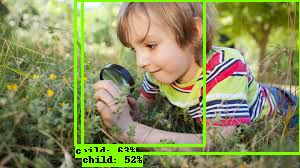

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (7)_boxed.jpg


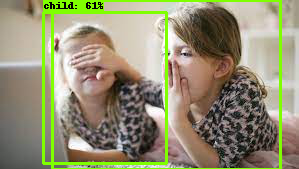

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (3)_boxed.jpg


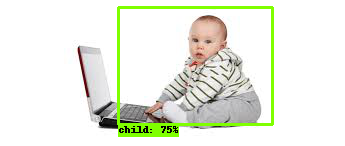

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/Download_boxed.jpg


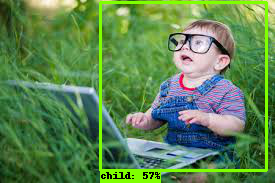

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (2)_boxed.jpg


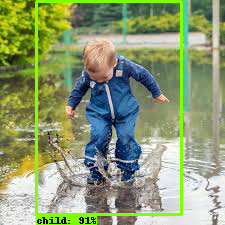

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (6)_boxed.jpg


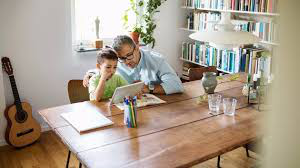

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (5)_boxed.jpg


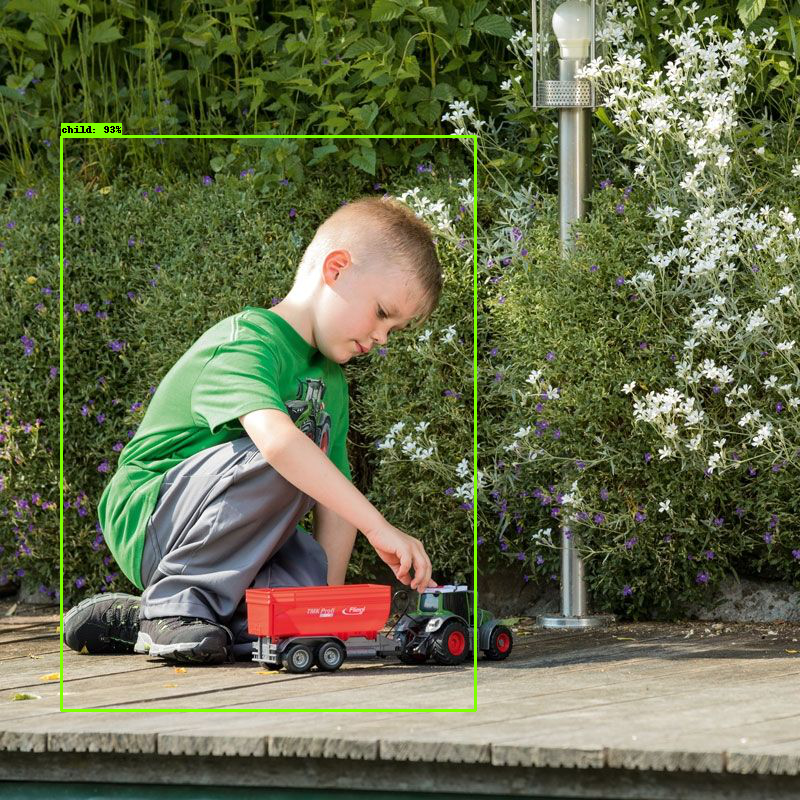

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/toy_models_boxed.jpg


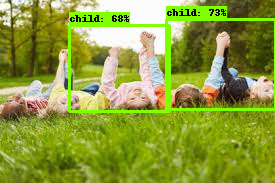

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (14)_boxed.jpg


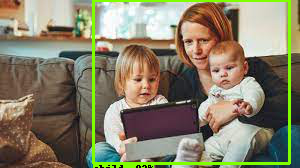

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images_boxed.jpg


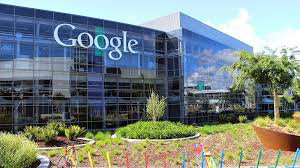

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (4)_boxed.jpg


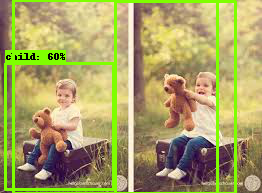

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (1)_boxed.jpg


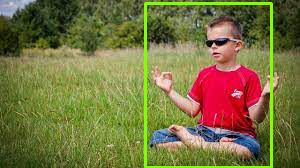

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/Download (1)_boxed.jpg


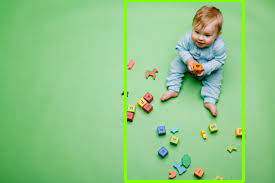

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/Download (2)_boxed.jpg


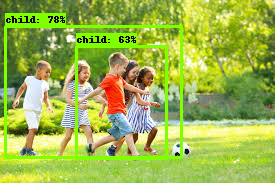

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (11)_boxed.jpg


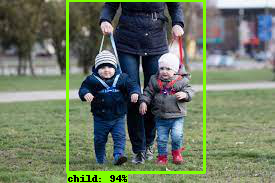

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (10)_boxed.jpg


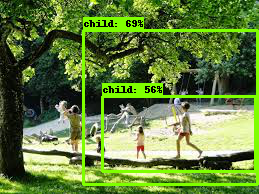

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (13)_boxed.jpg


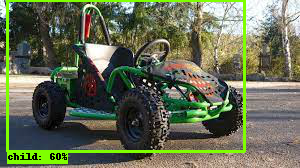

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (8)_boxed.jpg


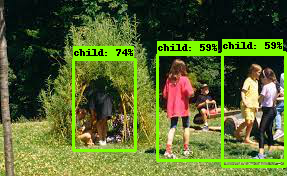

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (9)_boxed.jpg


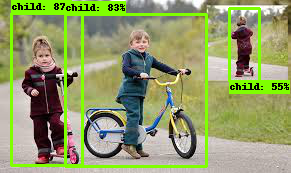

/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (12)_boxed.jpg


In [ ]:
for image_path in glob.glob('/content/drive/MyDrive/Child_Dataset/testEval/*.jpg'):

  image_name = os.path.basename(image_path).replace(".jpg", "")
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  outImg = vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=3)
  
  im = Image.fromarray(outImg)
  display(Image.fromarray(image_np))
  print (speicherPfadEvalBilder + "/" + image_name + "_boxed.jpg")
  im.save(speicherPfadEvalBilder + "/" + image_name + "_boxed.jpg")
